<a href="https://colab.research.google.com/github/HerbertAnchovy/notebooks/blob/master/Week_2_project_Chester_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<a id="Top"></a>
<img style="float: left;" src="https://msds.open.ac.uk/includes/oulogo_hor_75x55.gif">&nbsp;&nbsp;&nbsp;
</div>
<br/>
<br/>

# Project 2:  Holiday weather - Chester, UK

#### by [Jez Phipps](https://www.futurelearn.com/profiles/3841612) (17th October 2016).

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

In this project I am going to use the historic weather data from the Weather Underground website for the historic city of [_Chester_](http://www.visitchester.com/perfect-chester). In a rather rare burst of optimism, I 'decided' to attempt to predict the best two good weeks to take off next summer. Of course the weather next year may be very different to 2015 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

The 'Chester_2015.csv' source data can be obtained as follows. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens, start typing 'Chester' in the 'Location' input box and when the pop up menu comes up with the option 'Chester, United Kingdom' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2015 to: 31 December 2015 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data and then right click on the blue link labelled 'Comma Delimited File':

- if you are using the Safari Browser choose Download Linked File As ... 
- if you are using the Chrome Browser choose Save Link As ... 

then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'Chester_2015.csv'.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [0]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
chester = read_csv('Chester_2015.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [0]:
chester = chester.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [0]:
chester['WindDirDegrees'] = chester['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [0]:
chester['WindDirDegrees'] = chester['WindDirDegrees'].astype('float64')
chester['WindDirDegrees'].dtypes

dtype('float64')

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [0]:
chester['GMT'] = to_datetime(chester['GMT'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [0]:
chester.index = chester['GMT']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [0]:
summer = chester.ix[datetime(2015,6,1) : datetime(2015,8,31)]

I'll now look for the days with warm temperatures.

In [0]:
summer[summer['Mean TemperatureC'] >= 25]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,


Summer 2015 was rather cool in Chester: there are no days with temperatures of 25 &deg;C or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [0]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

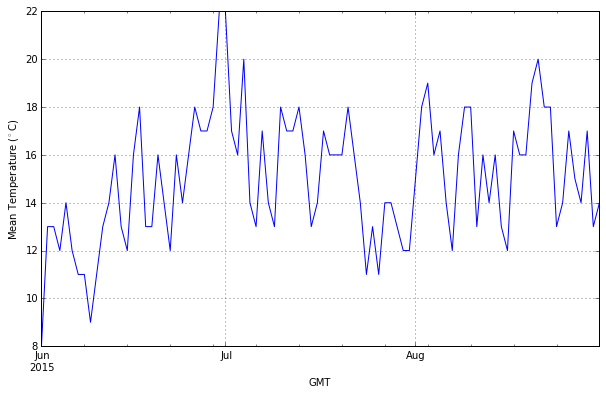

In [0]:
ax=summer['Mean TemperatureC'].plot(grid=True, figsize=(10,6))
ax.set_ylabel('Mean Temperature ($^\circ$C)')

Looking at the graph above, it is apparent that the two weeks at the end of June have mean temperatures over 20 &deg;C.

Let's also put precipitation on the graph:

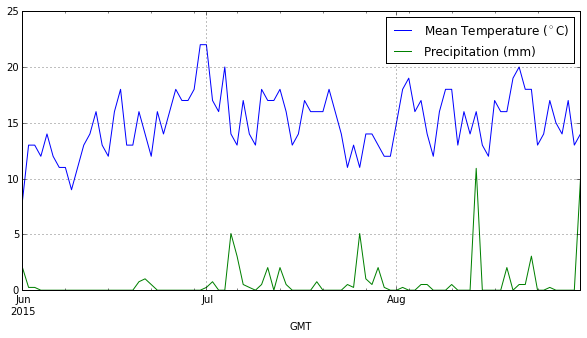

In [0]:
ax=summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))
myLabels = ['Mean Temperature ($^\circ$C)', 'Precipitation (mm)']
ax.legend(labels=myLabels)

The end of June / beginning of July still looks pretty good, with very little rain. Let's have a closer look by just plotting mean temperature and precipitation for the four weeks that span the end of June / beginning of July.  

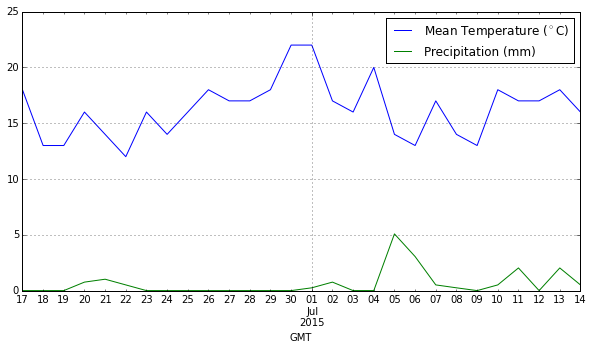

In [0]:
junejuly = summer.ix[datetime(2015,6,17) : datetime(2015,7,14)]
ax=junejuly[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))
myLabels = ['Mean Temperature ($^\circ$C)', 'Precipitation (mm)']
ax.legend(labels=myLabels)

In [0]:
print("Average (mean) temperature over this period is about {0:.1f}" .format(junejuly['Mean TemperatureC'].mean()) + " " + u'\u2103.')

Average (mean) temperature over this period is about 16.3 ℃.


The two weeks at the end of June and beginning ofJuly look like the best bet overall, with very little rain (9 totally dry days and only 1 day with significant rainfall (~5 mm on 5th July). Temperatures are also the best of the summer, with an average (mean) temperature of about 16 &deg;C (see calculation above) and five days where the temperatures are between 18 &deg;C and 22 &deg;C.

## Conclusions

The graphs have shown the volatility of a British summer, but a couple of weeks were found when the weather wasn't too bad in Chester in 2015. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.

<a href="#Top"><img style="display:inline" src="http://www.abdn.ac.uk/global/images/layout/to_top_arrow.gif">Top of page</a>

In [0]:
print("\nPandas version", pandas.__version__, end="")


Pandas version 0.16.2

In [0]:
from IPython.display import HTML
HTML('''<script> 
code_show=false; 
function code_toggle() { 
if (code_show){ 
$('div.input').hide(); 
} else { 
$('div.input').show(); 
} 
code_show = !code_show 
location.href="#Top"; <!-- Jump back to #Top of the notebook window after an error-free Run All -->
} 
$( document ).ready(code_toggle); 
</script> 
<p class="do_not_print" style="display:inline"><center>Click <a href="javascript:code_toggle()">here</a> to toggle code visibility on/off</center></p>''')